In [13]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import warnings
warnings.filterwarnings("ignore")

In [14]:
DATASET_DIR = "/content/drive/MyDrive/datasets/Medicinal Leaf Images"

img_width, img_height = 256, 256
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

classes = train_generator.class_indices
class_names = list(classes.keys())
num_classes = len(classes)

print(f"Found {len(class_names)} classes: {class_names}")

Found 1479 images belonging to 30 classes.
Found 356 images belonging to 30 classes.
Found 30 classes: ['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Cr

In [15]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (5, 5), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Second convolutional block
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 84, 84, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 82, 82, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 41, 41, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 39, 39, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 23104)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      11,829,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,929,470 (45.51 MB)

 Trainable params: 11,929,470 (45.51 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Train the model
history = model.fit(
    train_generator,
    epochs=75,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.0510 - loss: 3.4858 - val_accuracy: 0.2017 - val_loss: 2.9912
Epoch 2/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.1875 - loss: 2.9088 - val_accuracy: 0.2131 - val_loss: 2.9819
Epoch 3/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.2189 - loss: 2.7739 - val_accuracy: 0.3949 - val_loss: 2.1500
Epoch 4/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.3125 - loss: 2.3914 - val_accuracy: 0.3750 - val_loss: 2.1630
Epoch 5/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 983ms/step - accuracy: 0.4236 - loss: 1.9583 - val_accuracy: 0.4773 - val_loss: 1.8575
Epoch 6/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.5625 - loss: 1.7642 - val_accuracy: 0.4545 - val_loss: 1.9001
Epoch 7/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4600 - loss: 1.7573 - val_accuracy: 0.4830 - val_loss: 1.7838
Epoch 8/75
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.4688 - loss: 1.7605 - val_accuracy: 0.505

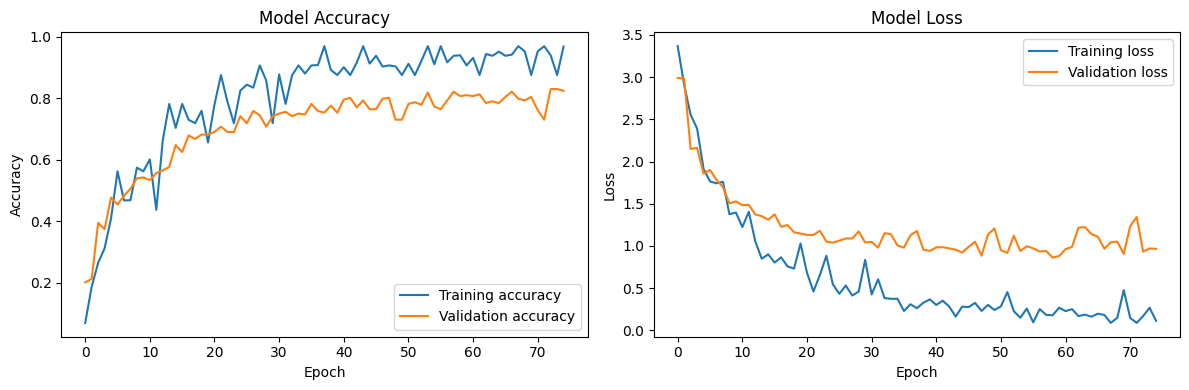

In [17]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

score, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test score: {score:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Found 1835 images belonging to 30 classes.
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 393ms/step - accuracy: 0.9448 - loss: 0.2845
Test score: 0.2535
Test accuracy: 0.9526


In [19]:
# Save the model
model.save('plant_classification_model.h5')
print("Model saved successfully")

Model saved successfully


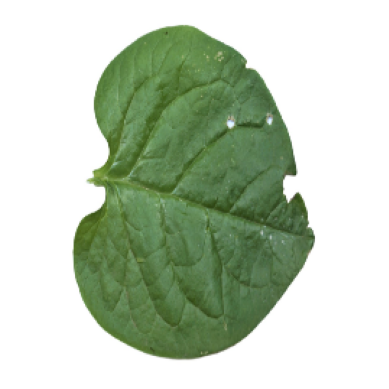

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted class: Basella Alba (Basale)
Confidence: 99.95%


('Basella Alba (Basale)', np.float32(99.9542))

In [20]:
def predict_image(img_path):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convert to array and normalize
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class] * 100

    print(f"Predicted class: {class_names[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")

    return class_names[predicted_class], confidence

predict_image("/content/drive/MyDrive/datasets/Medicinal Leaf Images/Basella Alba (Basale)/BA-S-001.jpg")

58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 488ms/step
                                              precision    recall  f1-score   support

                     Alpinia Galanga (Rasna)       0.98      0.98      0.98        50
            Amaranthus Viridis (Arive-Dantu)       0.94      0.96      0.95       122
        Artocarpus Heterophyllus (Jackfruit)       1.00      0.82      0.90        56
                   Azadirachta Indica (Neem)       0.97      0.98      0.98        60
                       Basella Alba (Basale)       1.00      0.94      0.97       103
            Brassica Juncea (Indian Mustard)       1.00      0.82      0.90        34
                  Carissa Carandas (Karanda)       0.99      0.96      0.97        74
                        Citrus Limon (Lemon)       0.95      0.95      0.95        57
             Ficus Auriculata (Roxburgh fig)       0.87      0.92      0.89        50
               Ficus Religiosa (Peepal Tree)       1.00      1.00      1.00        63
           

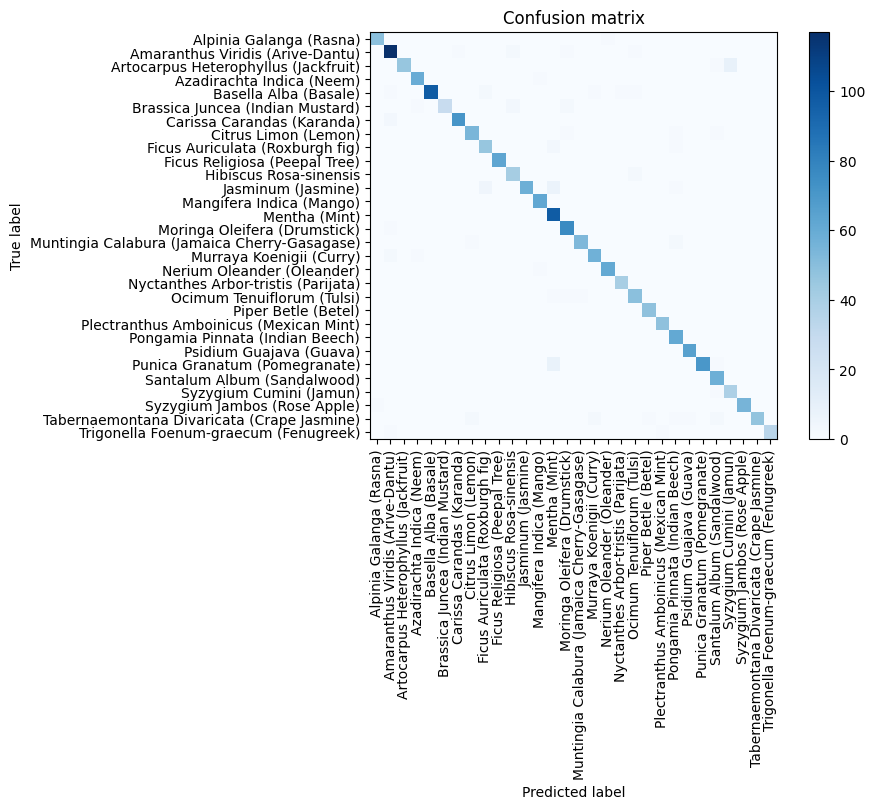

In [21]:
# Get more detailed metrics beyond accuracy
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Print detailed metrics
print(classification_report(
    true_classes,
    y_pred_classes,
    target_names=list(test_generator.class_indices.keys())
))

# Confusion matrix visualization
cm = confusion_matrix(true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=90)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()